In [1]:
import Orange
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Orange.ensembles import ada_boost
from Orange.ensembles.ada_boost import SklAdaBoostClassificationLearner
from Orange.evaluation import CA, Precision, AUC, Recall
import sklearn.tree as skl_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from Orange.base import TreeModel as TreeModelInterface
from Orange.classification import SklLearner, SklModel, Learner
from Orange.tree import Node, DiscreteNode, MappedDiscreteNode, NumericNode, TreeModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from Orange.classification import NaiveBayesLearner
from sklearn.linear_model import LogisticRegression
from Orange.classification import SklLearner, SklModel, Learner
from Orange.base import SklLearner
from Orange.classification.base_classification import SklLearnerClassification

C:\Users\Jelena\Anaconda3\lib\site-packages\pyqtgraph\colors\palette.py:1: RuntimeWarning: PyQtGraph supports Qt version >= 5.15, but 5.9.7 detected.
  from ..Qt import QtGui


In [2]:
df = pd.read_csv('Dynamic compaction analysis.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
encoder = OneHotEncoder()
y = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()

In [4]:
n_samples, n_classes = y.shape

In [5]:
def jitter1(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter1_test(classifier1, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            avg += metrics.accuracy_score(y.argmax(axis=1), classifier1.predict(jitter1(X, s)))
        out.append(avg / N)
    return out, scales

In [6]:
classifier1 = AdaBoostClassifier(random_state=0)
classifier1.fit(X, y.argmax(axis=1))

classifier1_scores, jitters1 = jitter1_test(classifier1, X, y)

In [7]:
def jitter2(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter2_test(classifier2, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            avg += metrics.accuracy_score(y.argmax(axis=1), classifier2.predict(jitter1(X, s)))
        out.append(avg / N)
    return out, scales

In [8]:
classifier2 = GaussianNB()
classifier2.fit(X, y.argmax(axis=1))

classifier2_scores, jitters2 = jitter2_test(classifier2, X, y)

In [9]:
def jitter3(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter3_test(classifier3, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            avg += metrics.accuracy_score(y.argmax(axis=1), classifier3.predict(jitter1(X, s)))
        out.append(avg / N)
    return out, scales

In [10]:
classifier3 = LogisticRegression(multi_class='ovr', C=0.06, max_iter=10000, solver='liblinear', n_jobs=1)
classifier3.fit(X, y.argmax(axis=1))
                    
classifier3_scores, jitters3 = jitter3_test(classifier3, X, y)

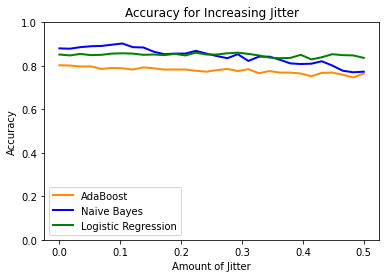

In [11]:
plt.figure()
lw = 2
plt.plot(jitters1, classifier1_scores, color='darkorange',
         lw=lw, label='AdaBoost')
plt.plot(jitters2, classifier2_scores, color='blue',
         lw=lw, label='Naive Bayes')
plt.plot(jitters3, classifier3_scores, color='green',
         lw=lw, label='Logistic Regression')
plt.xlabel('Amount of Jitter')
plt.ylabel('Accuracy')
plt.title('Accuracy for Increasing Jitter')
plt.legend(loc="lower left")
plt.ylim(0, 1)
plt.show()